# K-Means Clustering in R

Clustering is a technique in machine learning that attempts to find *clusters* of [observations](https://www.statology.org/observation-in-statistics/) within a dataset.

The goal is to find clusters such that the observations within each cluster are quite similar to each other, while observations in different clusters are quite different from each other.

Clustering is a form of [unsupervised learning](https://www.statology.org/supervised-vs-unsupervised-learning/) because we’re simply attempting to find structure within a dataset rather than predicting the value of some [response variable](https://www.statology.org/explanatory-response-variables/).

Clustering is often used in marketing when companies have access to information like:

- Household income
- Household size
- Head of household Occupation
- Distance from nearest urban area

When this information is available, clustering can be used to identify households that are similar and may be more likely to purchase certain products or respond better to a certain type of advertising.

One of the most common forms of clustering is known as k-means clustering.

## What is K-Means Clustering?

K-means clustering is a technique in which we place each observation in a dataset into one of *K* clusters.

The end goal is to have *K* clusters in which the observations within each cluster are quite similar to each other while the observations in different clusters are quite different from each other.

In practice, we use the following steps to perform K-means clustering:

1. Choose a value for *K*.

  - First, we must decide how many clusters we’d like to identify in the data. Often we have to simply test several different values for K and analyze the results to see which number of clusters seems to make the most sense for a given problem.

2. Randomly assign each observation to an initial cluster, from 1 to K.

3. Perform the following procedure until the cluster assignments stop changing.

  - For each of the *K* clusters, compute the cluster centroid. This is simply the vector of the *p* feature means for the observations in the *k*th cluster.
  - Assign each observation to the cluster whose centroid is closest. Here, *closest* is defined using [Euclidean distance](https://www.wikiwand.com/en/Euclidean_distance).

## K-Means Clustering in R

The following tutorial provides a step-by-step example of how to perform k-means clustering in R.

### Step 1: Load the Necessary Packages

> Indented block



In [ ]:
# Installing Packages; factoextra is an R package making easy to extract and visualize
# the output of exploratory multivariate data analyses
install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘RcppEigen’, ‘later’, ‘pbkrtest’, ‘lme4’, ‘promises’, ‘car’, ‘DT’, ‘cowplot’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
install.packages('cluster')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(factoextra)
library(cluster)

### Step 2: Load and Prep the Data

For this lab, we’ll use the *USArrests* dataset built into R, which contains the number of arrests
per 100,000 residents in each U.S. state in 1973 for *Murder*, *Assault*, and *Rape* along with the percentage of the population in each state living in urban areas, *UrbanPop*.

The following code shows how to do the following:

- Load the *USArrests* dataset
- Remove any rows with missing values
- Scale each variable in the dataset to have a mean of 0 and a standard deviation of 1

In [ ]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [ ]:
#load data
df <- USArrests
#remove rows with missing values.
# Write your code here.



#scale each variable to have a mean of 0 and sd of 1
# Write your code here.

#view first six rows of dataset
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


### Step 3: Find the Optimal Number of Clusters

To perform k-means clustering in R we can use the built-in `kmeans()` function, which uses the following syntax:

```
kmeans(data, centers, nstart)
```

where:
- data: Name of the dataset.
- centers: The number of clusters, denoted k.
- nstart: The number of initial configurations. Because it’s possible that different initial
 starting clusters can lead to different results, it’s recommended to use several different initial configurations. The k-means algorithm will find the initial configurations that lead to the smallest within-cluster variation.




#### Number of Clusters vs. the Total Within Sum of Squares

First, we’ll use the fviz_nbclust() function to create a plot of the number of clusters vs. the total within sum of squares:

In [ ]:
?fviz_nbclust


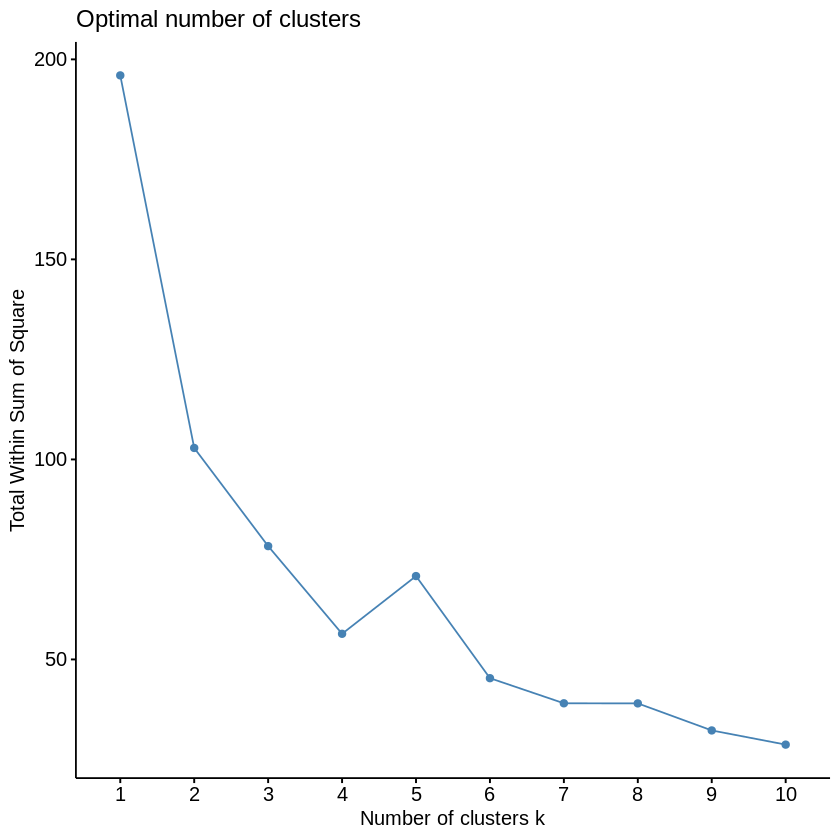

In [ ]:
# Use the fviz_nbclust function, providing kmeans as clustering function and wss as method.

# Write your code here.

Typically when we create this type of plot we look for an “elbow” where the sum of squares begins to “bend” or level off. This is typically the optimal number of clusters.

For this plot it appear that there is a bit of an elbow or “bend” at k = 4 clusters.

From the plot we can see that gap statistic is highest at k = 4 clusters, which matches the elbow method we used earlier.

### Step 4: Perform K-Means Clustering with Optimal K

Lastly, we can perform k-means clustering on the dataset using the optimal value for k of 4:

In [ ]:
?kmeans

In [ ]:
#make this example reproducible
set.seed(1)
#perform k-means clustering with k = 4 clusters and nstart = 25 ;nstart represents the number of random data sets used to run the algorithm
km <- # Write your code here.

#view results
km

K-means clustering with 4 clusters of sizes 13, 13, 16, 8

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2  0.6950701  1.0394414  0.7226370  1.27693964
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  1.4118898  0.8743346 -0.8145211  0.01927104

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              2              2              4              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              1              2              3              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              1              4              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi    

From the results we can see that:

- 16 states were assigned to the first cluster
- 13 states were assigned to the second cluster
- 13 states were assigned to the third cluster
- 8 states were assigned to the fourth cluster
 

We can visualize the clusters on a scatterplot using the `fivz_cluster()` function:


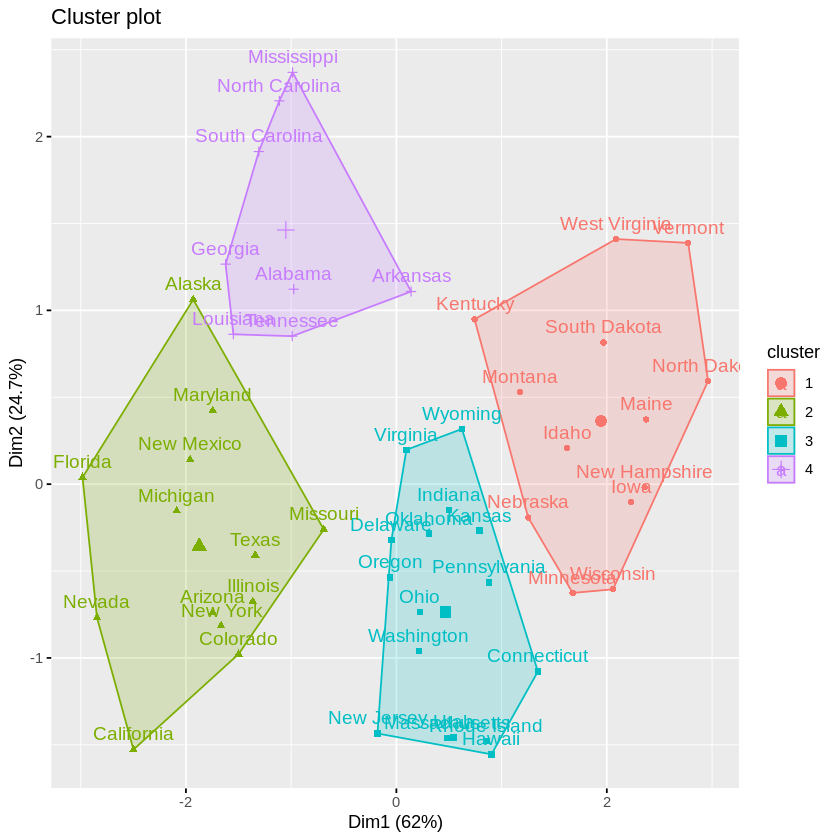

In [ ]:
#plot results of final k-means model
#?fviz_cluster
# Write your code here.
fviz_cluster(# Write your code here.)

We can also use the `aggregate()` function to find the mean of the variables in 
each cluster:

In [ ]:
#find means of each cluster
# Write your code in here
aggregate(# Write your code here.)

cluster,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.60000,78.53846,52.07692,12.17692
2,10.81538,257.38462,76.00000,33.19231
3,5.65625,138.87500,73.87500,18.78125
4,13.93750,243.62500,53.75000,21.41250


In [ ]:
#add cluster assigment to original data
final_data <- cbind(# Write your code here.)

#view final data
head(final_data)

,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
